In [9]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

square_footage_data = [50,45,86,90,34]
num_bedrooms_data = [2,1,3,4,1]
house_prices_data = [80000,72000,96000,102000,54000]

house_data = [data for data in zip(square_footage_data,num_bedrooms_data)]


features_tensor = torch.tensor(house_data,dtype=torch.float32)
labels_tensor = torch.tensor(house_prices_data,dtype=torch.float).unsqueeze(1)


class PriceDataSet(Dataset):
    
    def __init__(self,features_tensor,labels_tensor):
        self.features = features_tensor
        self.labels = labels_tensor

    def __len__(self):
        return len(self.features)

    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]

house_dataset = PriceDataSet(features_tensor,labels_tensor)
house_loader = DataLoader(house_dataset,batch_size=2,shuffle=True)

class HousePricePredictor(nn.Module):
    
    def __init__(self,input_features,hidden_size,output_size):
        super().__init__()
        self.input_layer1 = nn.Linear(input_features,hidden_size)
        self.input_layer2 = nn.Linear(hidden_size,output_size)

    def forward(self,x):

        x = self.input_layer1(x)
        x = F.relu(x)
        x = self.input_layer2(x)
        return x


input_features = features_tensor.size(1)
hidden_size = 10
output_size = 1
learning_rate = 0.05
epochs = 100 
batch_size = 2


model = HousePricePredictor(input_features,hidden_size,output_size)

loss_fp = nn.MSELoss()

param = model.parameters()
optimizer = torch.optim.Adam( param, lr=learning_rate)


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model.to(device)



for epoch in range(epochs):
    
    model.train()
    train_loss=0.0

    for inputs,target in house_loader:
        
        inputs = inputs.to(device)
        target = target.to(device)

        predictions = model(inputs)
        loss = loss_fp(predictions,target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(house_loader)
    if epoch == 0 or epoch%10 == 0:
        print(f"Epoch number #{epoch} and average loss is {avg_train_loss}")

def predict_price(square_footage,num_bedrooms,model,device):

    model.eval()

    input_data = [[square_footage,num_bedrooms]]
    input_tensor = torch.tensor(input_data,dtype = torch.float32)
    input_tensor = input_tensor.to(device)


    with torch.no_grad():
        predicted_tensor_price = model(input_tensor)
        predicted_price = predicted_tensor_price.item()

    return predicted_price

print("\n--- Testing Inference on New House Data ---")

# Example new houses
house1_sqft = 70
house1_beds = 2
house2_sqft = 120
house2_beds = 4
house3_sqft = 40
house3_beds = 1

# Call the function to predict price for each house
predicted_price1 = predict_price(house1_sqft, house1_beds, model, device)
print(f"House 1 (SqFt: {house1_sqft}, Beds: {house1_beds}) -> Predicted Price: ${predicted_price1:.2f}")

predicted_price2 = predict_price(house2_sqft, house2_beds, model, device)
print(f"House 2 (SqFt: {house2_sqft}, Beds: {house2_beds}) -> Predicted Price: ${predicted_price2:.2f}")

predicted_price3 = predict_price(house3_sqft, house3_beds, model, device)
print(f"House 3 (SqFt: {house3_sqft}, Beds: {house3_beds}) -> Predicted Price: ${predicted_price3:.2f}")




Epoch number #0 and average loss is 6753553066.666667
Epoch number #10 and average loss is 6093298773.333333
Epoch number #20 and average loss is 6161423530.666667
Epoch number #30 and average loss is 5263032149.333333
Epoch number #40 and average loss is 5319120725.333333
Epoch number #50 and average loss is 3970934528.0
Epoch number #60 and average loss is 2946525440.0
Epoch number #70 and average loss is 1981715157.3333333
Epoch number #80 and average loss is 1322685568.0
Epoch number #90 and average loss is 655001717.3333334

--- Testing Inference on New House Data ---
House 1 (SqFt: 70, Beds: 2) -> Predicted Price: $70657.26
House 2 (SqFt: 120, Beds: 4) -> Predicted Price: $120887.18
House 3 (SqFt: 40, Beds: 1) -> Predicted Price: $40698.00


Using device for training: cuda

Starting Training for House Price Predictor...
Epoch [1/200], Train Loss: 7005273600.00, Val Loss: 7105716224.00, Val RMSE: $84295.41
Epoch [10/200], Train Loss: 6998652160.00, Val Loss: 7098845696.00, Val RMSE: $84254.65
Epoch [20/200], Train Loss: 6987435008.00, Val Loss: 7087009792.00, Val RMSE: $84184.38
Epoch [30/200], Train Loss: 6966298368.00, Val Loss: 7064804864.00, Val RMSE: $84052.39
Epoch [40/200], Train Loss: 6931532672.00, Val Loss: 7028498432.00, Val RMSE: $83836.14
Epoch [50/200], Train Loss: 6881056000.00, Val Loss: 6976533504.00, Val RMSE: $83525.65
Epoch [60/200], Train Loss: 6816127616.00, Val Loss: 6909750784.00, Val RMSE: $83124.91
Epoch [70/200], Train Loss: 6736875008.00, Val Loss: 6829167616.00, Val RMSE: $82638.78
Epoch [80/200], Train Loss: 6644768256.00, Val Loss: 6735114240.00, Val RMSE: $82067.74
Epoch [90/200], Train Loss: 6540910208.00, Val Loss: 6628702208.00, Val RMSE: $81416.84
Epoch [100/200], Train Loss: 6424641920.0

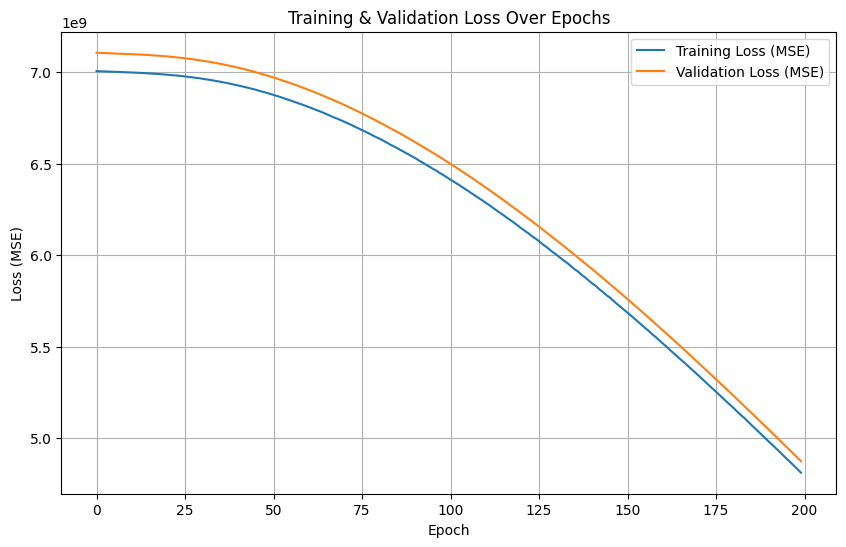


--- Generating Predictions vs. Actuals Plot ---


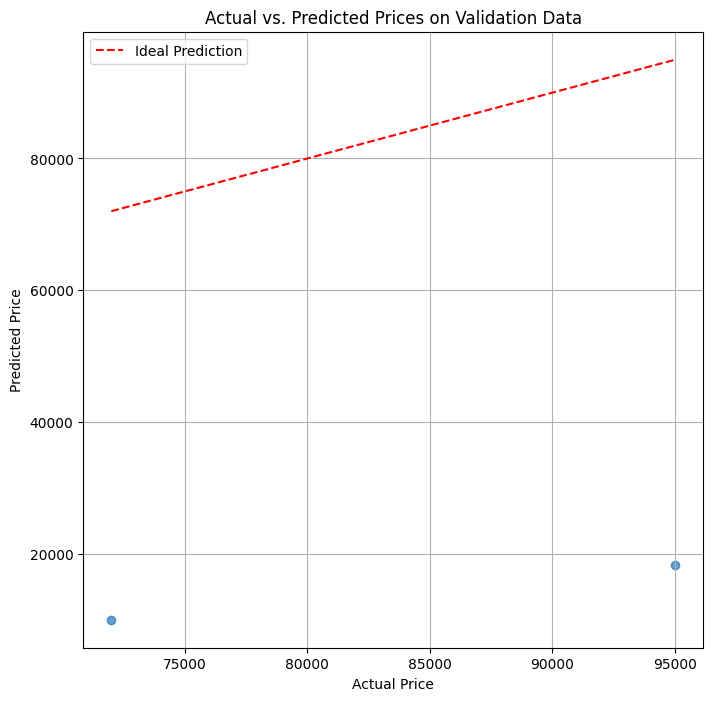


--- Saving and Loading Model ---
Model saved to house_price_predictor_model.pth
Prediction from loaded model (SqFt: 70, Beds: 2): $15450.48


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib
import time # To track training time


# --- Raw Data ---
# Increased data points to ensure proper splitting (10 samples)
square_footage_data = [50, 45, 86, 90, 34, 75, 55, 68, 82, 42]
num_bedrooms_data = [2, 1, 3, 4, 1, 3, 2, 3, 3, 1]
house_prices_data = [80000, 72000, 96000, 102000, 54000, 89000, 78000, 92000, 95000, 68000]

# --- Data Preparation & Splitting ---
# 1. Combine raw Python lists into NumPy arrays
X_np = np.array(list(zip(square_footage_data, num_bedrooms_data))) # Features
Y_np = np.array(house_prices_data) # Labels - Ensure this is 1D for train_test_split

# 2. Split the NumPy data into training and validation sets
X_train_np, X_val_np, Y_train_np, Y_val_np = train_test_split(
    X_np, Y_np, test_size=0.2, random_state=42
)

# 3. Convert split NumPy arrays to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)

# Y_train_tensor and Y_val_tensor should be (num_samples, 1) for MSELoss
Y_train_tensor = torch.tensor(Y_train_np, dtype=torch.float32).unsqueeze(1) # Corrected for shape
Y_val_tensor = torch.tensor(Y_val_np, dtype=torch.float32).unsqueeze(1)     # Corrected for shape


# --- Custom Dataset Definition ---
class PriceDataSet(Dataset):
    def __init__(self, features_tensor, labels_tensor):
        self.features = features_tensor
        self.labels = labels_tensor

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# --- Create Dataset and DataLoader for TRAINING data ---
train_dataset = PriceDataSet(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# --- Create Dataset and DataLoader for VALIDATION data ---
val_dataset = PriceDataSet(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False) # Shuffle False for validation

# --- Model Definition (HousePricePredictor) ---
class HousePricePredictor(nn.Module):
    def __init__(self, input_features, hidden_size, output_size):
        super().__init__()
        self.input_layer1 = nn.Linear(input_features, hidden_size)
        self.input_layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.input_layer1(x)
        x = F.relu(x)
        x = self.input_layer2(x)
        return x

# --- Configuration for Training ---
INPUT_FEATURES = X_train_tensor.size(1) # Number of features per sample (2)
HIDDEN_SIZE = 10
OUTPUT_SIZE = 1 # Single price prediction
LEARNING_RATE = 0.005 # Adjusted for potential better convergence on this data
EPOCHS = 200 # Increased epochs slightly
BATCH_SIZE = 2

# --- Model Instantiation ---
model = HousePricePredictor(INPUT_FEATURES, HIDDEN_SIZE, OUTPUT_SIZE)

# --- Loss Function and Optimizer Definition ---
loss_fn = nn.MSELoss() # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# --- Device Setup (CPU vs GPU) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device for training: {device}")

# --- Training and Validation Loop ---
print("\nStarting Training for House Price Predictor...")
train_losses = [] # To store training loss for plotting
val_losses = []   # To store validation loss for plotting

for epoch in range(EPOCHS):
    model.train() # Set model to training mode
    current_train_loss_sum = 0.0

    for inputs, targets in train_loader: # Use train_loader for training
        inputs, targets = inputs.to(device), targets.to(device) # Move data to device

        predictions = model(inputs)
        loss = loss_fn(predictions, targets)
        current_train_loss_sum += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = current_train_loss_sum / len(train_loader)
    train_losses.append(avg_train_loss) # Store for plotting

    # --- Validation Phase ---
    model.eval() # Set model to evaluation mode
    current_val_loss_sum = 0.0
    with torch.no_grad(): # Disable gradient calculations for validation
        for inputs, targets in val_loader: # Use val_loader for validation
            inputs, targets = inputs.to(device), targets.to(device) # <-- FIX: Move data to device in validation loop
            val_predictions = model(inputs)
            val_loss = loss_fn(val_predictions, targets) # Use targets variable directly
            current_val_loss_sum += val_loss.item()
    
    avg_val_loss = current_val_loss_sum / len(val_loader)
    val_losses.append(avg_val_loss) # Store for plotting

    # Print progress report (every 10 epochs or first)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        # Calculate RMSE for more interpretable validation metric
        rmse = np.sqrt(avg_val_loss) # RMSE is sqrt of MSE
        print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {avg_train_loss:.2f}, Val Loss: {avg_val_loss:.2f}, Val RMSE: ${rmse:.2f}")

print("\nTraining Finished!")

# --- Inference Function ---
# This function uses the trained model to predict price for new house features.
def predict_price(square_footage, num_bedrooms, model, device):
    model.eval() # Set model to evaluation mode
    
    input_data = [[square_footage, num_bedrooms]]
    input_tensor = torch.tensor(input_data, dtype=torch.float32).to(device) # Combine to tensor and move to device

    with torch.no_grad():
        predicted_price_tensor = model(input_tensor)
        predicted_price = predicted_price_tensor.item()
    return predicted_price

# --- Testing Inference on New House Data ---
print("\n--- Testing Inference on New House Data ---")

house1_sqft = 70
house1_beds = 2
house2_sqft = 120
house2_beds = 4
house3_sqft = 40
house3_beds = 1
house4_sqft = 65 # Added new house to test more

# Call the function to predict price for each house
predicted_price1 = predict_price(house1_sqft, house1_beds, model, device)
print(f"House 1 (SqFt: {house1_sqft}, Beds: {house1_beds}) -> Predicted Price: ${predicted_price1:.2f}")

predicted_price2 = predict_price(house2_sqft, house2_beds, model, device)
print(f"House 2 (SqFt: {house2_sqft}, Beds: {house2_beds}) -> Predicted Price: ${predicted_price2:.2f}")

predicted_price3 = predict_price(house3_sqft, house3_beds, model, device)
print(f"House 3 (SqFt: {house3_sqft}, Beds: {house3_beds}) -> Predicted Price: ${predicted_price3:.2f}")


# --- Plotting Training & Validation Loss ---
print("\n--- Generating Loss Plot ---")
plt.figure(figsize=(10, 6))
plt.plot(range(EPOCHS), train_losses, label='Training Loss (MSE)')
plt.plot(range(EPOCHS), val_losses, label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# --- Plotting Predictions vs. Actuals for Validation Data ---
print("\n--- Generating Predictions vs. Actuals Plot ---")
model.eval()
val_preds = []
val_targets = []
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        predictions = model(inputs)
        val_preds.extend(predictions.cpu().numpy())
        val_targets.extend(targets.cpu().numpy())

plt.figure(figsize=(8, 8))
plt.scatter(val_targets, val_preds, alpha=0.7)
plt.plot([min(val_targets), max(val_targets)], [min(val_targets), max(val_targets)], 'r--', label='Ideal Prediction') # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices on Validation Data')
plt.grid(True)
plt.legend()
plt.show()

# --- Model Saving and Loading ---
print("\n--- Saving and Loading Model ---")
MODEL_SAVE_PATH = "house_price_predictor_model.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")

# To load the model, you need to re-instantiate the model class first
loaded_model = HousePricePredictor(INPUT_FEATURES, HIDDEN_SIZE, OUTPUT_SIZE)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device) # Move loaded model to the correct device
loaded_model.eval() # Set to eval mode

# Test prediction with the loaded model
test_loaded_price = predict_price(70, 2, loaded_model, device)
print(f"Prediction from loaded model (SqFt: 70, Beds: 2): ${test_loaded_price:.2f}")